## **Assessment 0**

**Introduction**

The following documentation is an analysis of COVID-19 data relating to vaccinations rates, death rates and government stringency. Our aim is to analyse the data using regression resources and discuss the utility of these resources.

The following pre-requisites are required:


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

You will also need the following libraries: pandas, numpy, matplotlib, scikit-learn.

**Instructions for importing the datasets:**

1. You can import the first dataset [here](https://ourworldindata.org/covid-vaccinations). 
2. At the bottom right of the graph entitled "Daily COVID-19 vaccination doses administered per million people", there is a download button. Press this button and then choose to download "The full dataset used in this chart" as a CSV file.
3. Save this file to your prefered directory, under the file-name "covid_vaccinations.csv".
4. Import the second dataset [here](https://ourworldindata.org/covid-deaths) using the same instructions as above. (NOT the data under the heading "Our work belongs to everyone", but the data at the bottom right of the graph.)
5. Save this file under the file-name "covid_deaths.csv"
6. Import the third dataset [here](https://ourworldindata.org/covid-stringency-index) in the same way and save it under the file name "gov_stringency.csv"

**Analysis**

First we will complete an initial analysis of the first dataset using graphs and we will explore trends in vaccination rates by country. Using the chloropleth function written in Python below, we can see the global vaccination rates for any day of the year between 29/12/2020 and 11/02/2024.

In [10]:
file_path = 'dataset_folder/covid_vaccinations.csv'

dose_data = pd.read_csv(file_path)

n = len(dose_data)

list_of_countries = dose_data['Entity'].unique()

def chloropleth_for_day(day_str):
    day_data = dose_data[dose_data['Day'] == day_str]
    
    lib = day_data.groupby('Entity').agg(
        Doses=('COVID-19 doses (daily, 7-day average, per million people)', 'sum')).reset_index()
    
    fig = px.choropleth(data_frame=lib,
                        locations='Entity', 
                        locationmode='country names',
                        color='Doses', 
                        color_continuous_scale='Blues', 
                        title=f'COVID-19 Vaccine Doses on {day_str}')
    fig.show()

chloropleth_for_day('2022-01-01')

In [27]:
chloropleth_for_day('2023-06-01')

We can specifically see high densities of vaccination rollout in the Middle-East in countries such as Afghanistan, Turkmenistan and Uzbekistan, as well as some African countries such as Mozambique and Sierra Leone. However, these visualisations only capture an instant in time so it would also be useful to see how the data changes over a continuous time period. The following graphs show the changes in vaccination rates for a few specific countries.

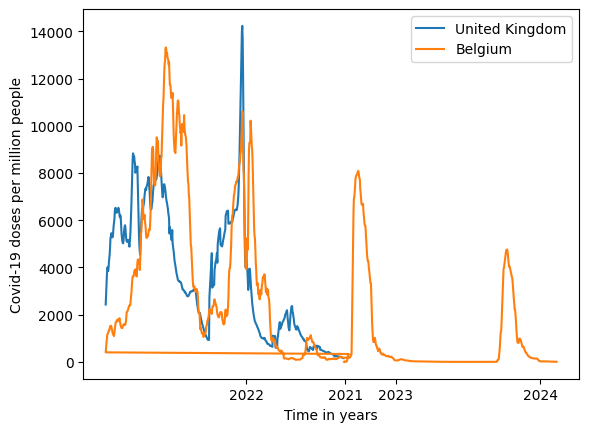

In [8]:
uk_doses = []
uk_time = []
belgium_doses = []
belgium_time = []

for i in range(n):
    if dose_data['Entity'][i] == 'United Kingdom':
        uk_doses.append(dose_data['COVID-19 doses (daily, 7-day average, per million people)'][i])
        uk_time.append(dose_data['Day'][i])

for i in range(n):
    if dose_data['Entity'][i] == 'Belgium':
        belgium_doses.append(dose_data['COVID-19 doses (daily, 7-day average, per million people)'][i])
        belgium_time.append(dose_data['Day'][i])

plt.plot(uk_time, uk_doses, label = 'United Kingdom')
plt.plot(belgium_time, belgium_doses, label = 'Belgium')
plt.xticks(['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], [2021, 2022, 2023, 2024])
plt.xlabel('Time in years')
plt.ylabel('Covid-19 doses per million people')
plt.legend()
plt.show()

The following graph uses second dataset and shows the COVID-19 deaths over time in UK and USA.

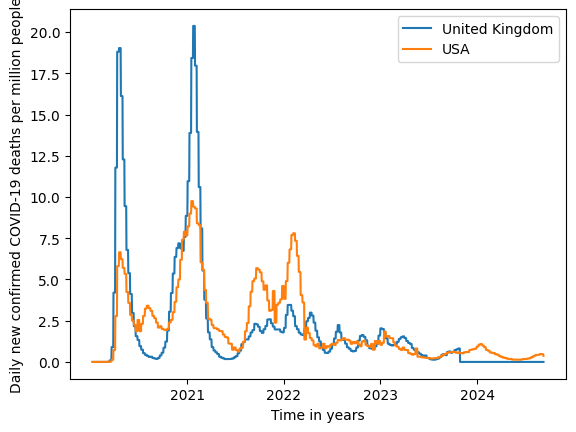

In [9]:
file_path1 = "dataset_folder/covid_deaths.csv"

deaths_data = pd.read_csv(file_path1)

n = len(deaths_data)

uk_deaths = []
uk_time = []
usa_deaths = []
usa_time = []

for i in range(n):
    if deaths_data["Entity"][i] == 'United Kingdom':
        uk_deaths.append(deaths_data["Daily new confirmed deaths due to COVID-19 per million people (rolling 7-day average, right-aligned)"][i])
        uk_time.append(deaths_data["Day"][i])

for i in range(n):
    if deaths_data["Entity"][i] == "United States":
        usa_deaths.append(deaths_data["Daily new confirmed deaths due to COVID-19 per million people (rolling 7-day average, right-aligned)"][i])
        usa_time.append(deaths_data["Day"][i])

plt.plot(uk_time, uk_deaths, label = "United Kingdom")
plt.plot(usa_time, usa_deaths, label = "USA")
plt.xticks(['2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01'], [2021, 2022, 2023, 2024])
plt.xlabel('Time in years')
plt.ylabel('Daily new confirmed COVID-19 deaths per million people')
plt.legend()
plt.show()

We want to analyse the relationship between COVID-19 deaths and vaccination rates, so we are going to use a simple linear regression model in order to see how changes in vaccination rates affect death rates.

In [23]:
merged_data = pd.merge(deaths_data, dose_data, on = ['Entity', 'Day'], how = 'inner') # Merge the two datasets

X = merged_data[['COVID-19 doses (daily, 7-day average, per million people)']] # Independent variable
Y = merged_data['Daily new confirmed deaths due to COVID-19 per million people (rolling 7-day average, right-aligned)'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Split the data into testing and training data

model = LinearRegression() # Initialise the Linear Regression Model

model.fit(x_train, y_train)

y_pred = model.predict(x_test) # Predict the COVID-19 death rate from the vaccination rate using the model

Now we will evaluate the model predictions and visualise the results using metrics such as the Mean Squared Error (MSE) and R-squared to see how well the model fits the test data. The MSE tells us the average squared difference between the actual and predicted values which R-squared tells us how much variance in the dependent variable is explained by the independent variable.

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 8.528163436249132
R-squared: 0.019719536707508034


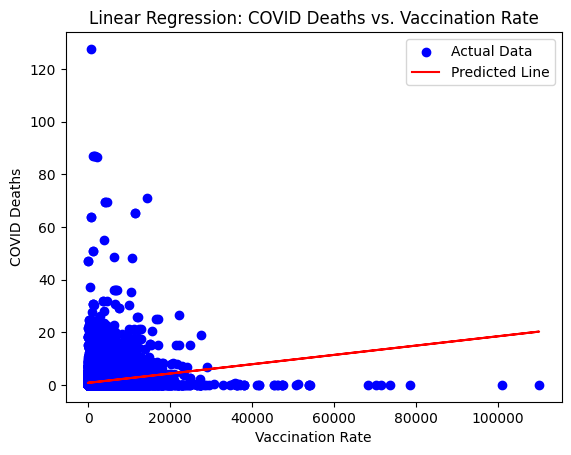

In [20]:
plt.scatter(x_test, y_test, color='blue', label='Actual Data')
plt.plot(x_test, y_pred, color='red', label='Predicted Line')
plt.xlabel('Vaccination Rate')
plt.ylabel('COVID Deaths')
plt.title('Linear Regression: COVID Deaths vs. Vaccination Rate')
plt.legend()
plt.show()

**Implications so far**

The scatter plot shows a cluster of data points at lower vaccination rates, while the predicted line is relatively flat suggesting the linear model does not predict a strong relationship between these two variables. The R-squared value is also very close to zero, indicating that the model explains only 1.7% of the variance in the data, while the MSE of 8.52 suggests that the model isn't very predictive. Limitations of the model are that it is likely that COVID-19 deaths and vaccination rates don't have a simple linear relationship. Thus we will now try a Polynomial Regression model to see if this more complex model provides a more accurate prediction.

In [25]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)
y_pred_poly = poly_model.predict(x_test_poly) # Model prediction
mse_poly = mean_squared_error(y_test, y_pred_poly) # MSE
r2_poly = r2_score(y_test, y_pred_poly) # R-squared value
print(f'Polynomial Model Mean Squared Error: {mse_poly}')
print(f'Polynomial Model R-squared: {r2_poly}')

Polynomial Model Mean Squared Error: 8.423868266911143
Polynomial Model R-squared: 0.03170787601198788


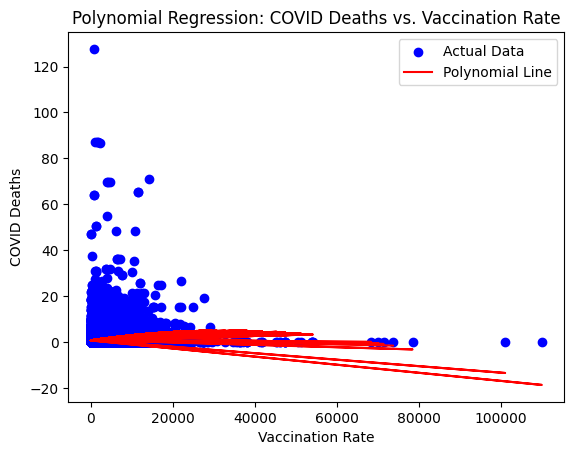

In [26]:
plt.scatter(x_test, y_test, color='blue', label='Actual Data')
plt.plot(x_test, y_pred_poly, color='red', label='Polynomial Line')
plt.xlabel('Vaccination Rate')
plt.ylabel('COVID Deaths')
plt.title('Polynomial Regression: COVID Deaths vs. Vaccination Rate')
plt.legend()
plt.show()

For the polynomial model the MSE is slightly lower, indicating a slightly better fit. However the difference is very small suggesting that it is not much bettter than the linear model. Similarly, the R-squared value is marginally higher for the polynomial model but is still small, meaning that the polynomial model explains only a very small percentage of the variance in COVID-19 deaths. The polynomial line in the graph above shows weak predictive power and suggests a risk of overfitting around the noise in the data, rather than the actual trends. While the model introduces more flexibility, it still has low predictive power and there is still the concern of correlation vs causation. In order to further improve the model's predictive power, we will look at confounding variables such as government stringency and will consider the more complex model of a Random Forest.

The stringency index is defined by Our World in Data as "a composite measure based on nine response indicators including school closures, workplaceclosures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest) ... Since government policies may differ by vaccination status, a stringency index is calculated for three categories: those who are vaccinated; those who are non-vaccinated; and a national average which is weighted based on the share of people that are vaccinated". For the sake of this model we will consider only the weighted average.

In [34]:
file_path2 = "dataset_folder/gov_stringency.csv"

gov_data = pd.read_csv(file_path2)
data = pd.merge(merged_data, gov_data, on = ['Entity', 'Day'])

X_rf = data[['COVID-19 doses (daily, 7-day average, per million people)', 'Stringency index (weighted average)']] # Independent variables
Y_rf = data['Daily new confirmed deaths due to COVID-19 per million people (rolling 7-day average, right-aligned)'] # Dependent variable

x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, Y_rf, test_size = 0.3, random_state = 42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Initialise the Random Forest Regressor
rf_model.fit(x_train_rf, y_train_rf) # Train the model

y_pred_rf = rf_model.predict(x_test_rf) # Model prediction
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2 = r2_score(y_test_rf, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse}")
print(f"Random Forest R-squared: {r2}")

Random Forest Mean Squared Error: 8.528163436249132
Random Forest R-squared: 0.3673563228622446


In [43]:
importances = rf_model.feature_importances_ # Feature importances

print(f"Feature Importance of vaccinations: {importances[0]}")
print(f"Feature Importance of government stringency: {importances[1]}")

Feature Importance of vaccinations: 0.5895803358777996
Feature Importance of government stringency: 0.41041966412220043


The feature importances quantify how much each figure contributes to the model's predictive power. Thus we can see that vaccinations contribute more to the model's predictions compared with government stringency, however both variables provide a significant amount of predictive power in the Random Forest model, and are relatively close to 0.5 showing that no single feature is overwhelmingly dominant. 

**Conclusions**

The use of a Linear Regression and Polynomial Regression models was relatively unsuccessful in explaining trends between vaccination and death rates. This could be due to a variety of factors including outliers in the data skewing the results, as well as our lack of control for confounding factors. However, using the Random Forest Model and accounting for some other factors using the dataset of government stringency, gave a more promising result with a significantly higher R-squared value, indicating correlation between the variables. 

**References**

[Our World in Data](https://ourworldindata.org/) - The site providing the datasets

[Built In](https://builtin.com/data-science/random-forest-algorithm) - A guide to Random Forests

[GeeksForGeeks](https://www.geeksforgeeks.org/ml-advantages-and-disadvantages-of-linear-regression/) - Pros and cons of regression models